<a href="https://colab.research.google.com/github/MariamwAmer/NLPMilestone1/blob/main/Updated_Da7ee7_M1_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#zip_path = "/content/drive/My Drive/NLP_Da7ee7/Da7ee7.zip"
zip_path = "/content/Da7ee7.zip"

In [2]:
!unzip -o "$zip_path" -d "/content/content"


Archive:  /content/Da7ee7.zip
  inflating: /content/content/Da7ee7/Preprocessed Data/processed_لماذا يرتكب الأذكياء حماقات؟  الدحيح.txt  
  inflating: /content/content/Da7ee7/Preprocessed Data/processed_ليه بنتخن في رمضان؟  الدحيح.txt  
  inflating: /content/content/Da7ee7/Preprocessed Data/processed_متى يصبح الحي ميت؟  الدحيح.txt  
  inflating: /content/content/Da7ee7/Preprocessed Data/processed_ماذا قال الدحيح عن برامجنا المفضلة؟  الدحيح.txt  
  inflating: /content/content/Da7ee7/Preprocessed Data/processed_ما يميت يفيد  الدحيح.txt  
  inflating: /content/content/Da7ee7/Preprocessed Data/processed_نحو نحوٍ افضل  الدحيح.txt  
  inflating: /content/content/Da7ee7/Preprocessed Data/processed_كيف لكائن انتصرنا عليه أن ينتصر علينا  الدحيح.txt  
  inflating: /content/content/Da7ee7/Preprocessed Data/processed_ماذا قال الدحيح عن الحساسية والموت والمقابر؟  الدحيح.txt  
  inflating: /content/content/Da7ee7/Preprocessed Data/processed_ماذا قال الدحيح عن الرعب والزلازل ونهاية العالم؟  الدحيح.tx

In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import pandas as pd

# Show full content without truncation
pd.set_option("display.max_colwidth", None)  # Show full text in cells
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns

Data Analysis

In [4]:
import os
import glob
import nltk
import pandas as pd
from collections import Counter

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:


folder_path = "/content/content/Da7ee7/Raw Data"
# Get all text files in the folder
all_files = glob.glob(os.path.join(folder_path, "*.txt"))

# Data storage
file_stats = []  # List to hold statistics per file
word_frequencies = []  # List to hold word frequencies
top_words_per_file = []  # List for top 10 most frequent words per file

total_sentences = 0
total_words = 0
unique_words = set()
total_word_length = 0

# Process each file
for file_path in all_files:
    with open(file_path, "r", encoding="utf-8") as file:
        text_data = file.read()

    # Tokenization
    words = nltk.word_tokenize(text_data)
    sentences = text_data.split("\n")  # Split by new lines
    word_counts = Counter(words)  # Count word frequencies

    # Collect file statistics
    file_stats.append({
        "Filename": os.path.basename(file_path),
        "Total Sentences": len(sentences),
        "Total Words": len(words),
        "Unique Words": len(set(words)),
        "Avg Sentence Length": len(words) / len(sentences) if sentences else 0,
        "Avg Word Length": sum(len(word) for word in words) / len(words) if words else 0,
    })

    # Collect top 10 most frequent words for each file
    top_10_words = word_counts.most_common(10)
    for word, count in top_10_words:
        top_words_per_file.append({
            "Filename": os.path.basename(file_path),
            "Word": word,
            "Frequency": count
        })

    # Collect all word frequencies
    for word, count in word_counts.items():
        word_frequencies.append({
            "Filename": os.path.basename(file_path),
            "Word": word,
            "Frequency": count
        })

    # Update global statistics
    total_sentences += len(sentences)
    total_words += len(words)
    unique_words.update(words)
    total_word_length += sum(len(word) for word in words)

# Convert lists to DataFrames
df_files = pd.DataFrame(file_stats)
df_word_frequencies = pd.DataFrame(word_frequencies)
df_top_words = pd.DataFrame(top_words_per_file)

# Overall statistics
df_overall_stats = pd.DataFrame([{
    "Total Files Processed": len(all_files),
    "Total Sentences": total_sentences,
    "Total Words": total_words,
    "Unique Words": len(unique_words),
    "Avg Sentence Length": total_words / total_sentences if total_sentences else 0,
    "Avg Word Length": total_word_length / total_words if total_words else 0,
}])

# Display DataFrames
print("\nFile-wise Statistics:")
print(df_files)

print("\nTop 10 Frequent Words per File:")
print(df_top_words)

print("\nOverall Statistics:")
print(df_overall_stats)



File-wise Statistics:
                                              Filename  Total Sentences  \
0                                 المماليك  الدحيح.txt             1150   
1                            تاريخ التشريح  الدحيح.txt              886   
2                                  الخنزير  الدحيح.txt              588   
3                                 الأعاصير  الدحيح.txt              768   
4                     السفينة التي لا تغرق  الدحيح.txt              998   
..                                                 ...              ...   
140                                إنترفيو  الدحيح.txt              571   
141                        الرئيس الأمريكي  الدحيح.txt             1013   
142               أشهر ملاهي في كوكب الارض  الدحيح.txt              765   
143  عندما ذهب عبقري الشطرنج بوبي فيشر إلى الحرب  ا...              978   
144              رجل ساذج في الرايخ الثالث  الدحيح.txt             1021   

     Total Words  Unique Words  Avg Sentence Length  Avg Word Length  
0    

In [6]:
df_overall_stats

Total Files Processed  Total Sentences  Total Words  Unique Words  \
0                    145           113988       863251        176394   

   Avg Sentence Length  Avg Word Length  
0             7.573174         4.116649

In [7]:
df_top_words

Filename Word  Frequency
0                      المماليك  الدحيح.txt    :        793
1                      المماليك  الدحيح.txt   ''        393
2                      المماليك  الدحيح.txt   ``        324
3                      المماليك  الدحيح.txt    .        264
4                      المماليك  الدحيح.txt    !        174
...                                     ...  ...        ...
1445  رجل ساذج في الرايخ الثالث  الدحيح.txt    !        134
1446  رجل ساذج في الرايخ الثالث  الدحيح.txt    ،        133
1447  رجل ساذج في الرايخ الثالث  الدحيح.txt  هيس        111
1448  رجل ساذج في الرايخ الثالث  الدحيح.txt   من        107
1449  رجل ساذج في الرايخ الثالث  الدحيح.txt   يا         90

[1450 rows x 3 columns]

In [8]:

import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

# Folder path (adjust based on actual structure)
folder_path = "/content/content/Da7ee7/Raw Data"

# Initialize an empty list for DataFrame storage
data = []

# List all `.txt` files in the folder
all_files = [f for f in os.listdir(folder_path) if f.endswith(".txt")]

# Loop through each file and read its content
for file_name in all_files:
    file_path = os.path.join(folder_path, file_name)  # Full path

    try:
        with open(file_path, "r", encoding="utf-8") as file:
            lines = file.readlines()  # Read lines

            # Store each line in a structured format
            for line_number, line in enumerate(lines, start=1):
                data.append({
                    "Filename": file_name,
                    "Line Number": line_number,
                    "Content": line.strip()  # Remove extra spaces/newlines
                })

    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Convert list to DataFrame
df = pd.DataFrame(data)

# Display first few rows
df.head(10)  # Show first 10 rows


Filename  Line Number  \
0  المماليك  الدحيح.txt            1   
1  المماليك  الدحيح.txt            2   
2  المماليك  الدحيح.txt            3   
3  المماليك  الدحيح.txt            4   
4  المماليك  الدحيح.txt            5   
5  المماليك  الدحيح.txt            6   
6  المماليك  الدحيح.txt            7   
7  المماليك  الدحيح.txt            8   
8  المماليك  الدحيح.txt            9   
9  المماليك  الدحيح.txt           10   

                                      Content  
0                    6.409: قرّب، قرّب، قرّب!  
1                          8.721: قرّب، قرّب!  
2                  10.248: لو زهقان، هيسلّوك.  
3                 12.45: لو معاك، مش هيسيبوك.  
4          15.062: وفي ساحة المعركة، هينصفوك.  
5         17.891: قرّب، قرّب، واشتري المملوك.  
6                20.257: يا ابني، اعتقني بقى!  
7            21.914: أبوك عاش عمره كله، ومات،  
8                            وما عرفش يبيعنا.  
9  25.383: أنا قلبي على مستقبلك يا عم "حسين"،

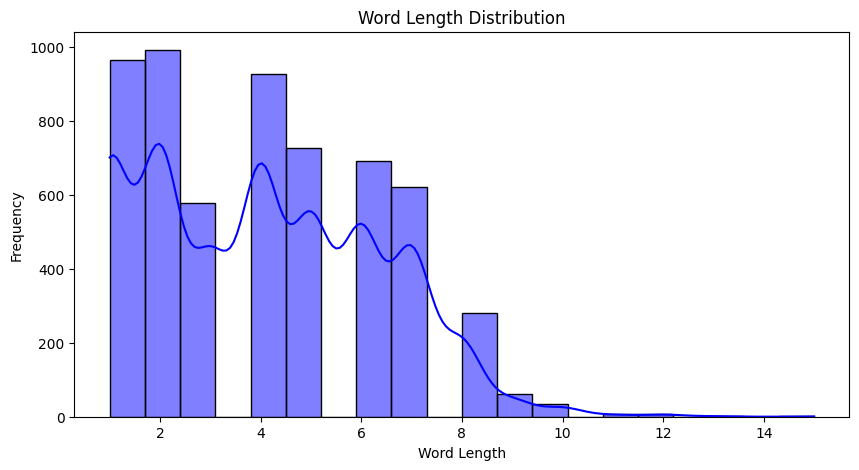

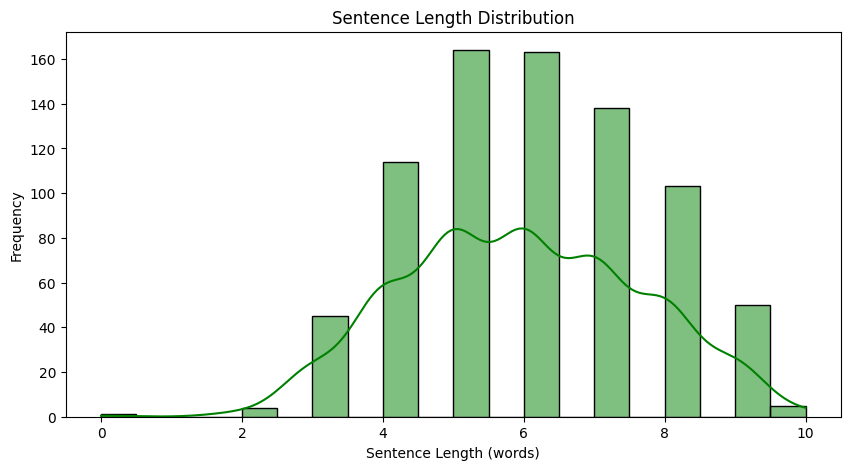

In [ ]:
# Word & Sentence Length Distribution

import seaborn as sns
import matplotlib.pyplot as plt

# Word Length Distribution
word_lengths = [len(word) for word in words]

plt.figure(figsize=(10, 5))
sns.histplot(word_lengths, bins=20, kde=True, color="blue")
plt.xlabel("Word Length")
plt.ylabel("Frequency")
plt.title("Word Length Distribution")
plt.show()

# Sentence Length Distribution
sentence_lengths = [len(sentence.split()) for sentence in sentences]

plt.figure(figsize=(10, 5))
sns.histplot(sentence_lengths, bins=20, kde=True, color="green")
plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.title("Sentence Length Distribution")
plt.show()

In [ ]:
# Repeated words are alot
# Measures vocabulary richness.
TTR = len(set(words)) / len(words)
print(f"Type-Token Ratio (TTR): {TTR:.2f}")


Type-Token Ratio (TTR): 0.44


In [ ]:
# Readability Score --> Estimate complexity.
print(f"Average Sentence Length: {len(words) / len(sentences):.2f} words")
print(f"Average Word Length: {sum(len(word) for word in words) / len(words):.2f} characters")


Average Sentence Length: 7.48 words
Average Word Length: 4.05 characters


In [9]:
import pandas as pd

# Assuming df is already loaded
df_grouped = df.groupby("Filename")["Content"].apply(lambda x: " ".join(x)).reset_index()

# Display the modified DataFrame
df_grouped

Filename  \
0                                 Chat GPT  الدحيح.txt   
1                              Oppenheimer  الدحيح.txt   
2                        آخر يوم في العالم  الدحيح.txt   
3                      أحلى برجر في العالم  الدحيح.txt   
4                               أحمد عدوية  الدحيح.txt   
..                                                 ...   
140                                هانيبال  الدحيح.txt   
141  هل يمكن أن تصل درجة الحرارة في الرياض وبغداد إ...   
142                 يوم في حياة رائـد فضاء  الدحيح.txt   
143                        يوم قيامة النجم  الدحيح.txt   
144                                      😂  الدحيح.txt   

                                               Content  
0    4.25: [موسيقى] 10.32: [موسيقى] 12.139: عمي بسي...  
1    5.127: طبعًا يا "جون"، انت مستغرب، احنا خاظفين...  
2    0.986: انتم عارفين يا جماعة؟ احنا بقالنا 13 يو...  
3    0.6: ،أيوة يا ماما 1.773: ،واحشاني يا ست الكل ...  
4    0.0: [موسيقى] 3.6: راح فين يا فندم 7.319: شايف...  
..                                                 ...  
140  2.353: أوه، "ماركينوس"، لم أعُد أستطيع النوم، ...  
141  1.076: ياه يا بحر! 5.136: أنا تعبان أوي يا بحر...  
142  0.336: إيه يا جماعة؟ احنا مش كنا خلصنا من القص...  
143  0.719: كلنا بتشوف الشمس كل يوم بس محدش يعرف اص...  
144  6.931: قلب أزرق؟! أزرق؟! إيه القرف دا؟! 10.259...  

[145 rows x 2 columns]

In [ ]:
# Save to CSV
df_grouped.to_csv("merged_files.csv", index=False, encoding="utf-8")

print("CSV file saved as 'merged_files.csv'")

CSV file saved as 'merged_files.csv'


Bigrams

In [ ]:
!pip install nltk pandas matplotlib wordcloud


N-gram before cleaning

In [ ]:
import nltk
from nltk import bigrams
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Function to tokenize text and extract bigrams
def get_bigrams(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
    bigram_list = list(bigrams(tokens))  # Generate bigrams
    return bigram_list

# Apply the function to each file's content
df_grouped["Bigrams"] = df_grouped["Content"].apply(get_bigrams)



In [ ]:
# Function to tokenize text and extract bigrams
def get_bigrams(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
    bigram_list = list(bigrams(tokens))  # Generate bigrams
    return bigram_list

# Apply the function to each file's content
df_grouped["Bigrams"] = df_grouped["Content"].apply(get_bigrams)

# Flatten all bigrams across all files
all_bigrams = [bigram for bigram_list in df_grouped["Bigrams"] for bigram in bigram_list]

# Count most common bigrams
bigram_counts = Counter(all_bigrams)

# Display the top 10 bigrams
print("Top 10 Bigrams:")
for bigram, count in bigram_counts.most_common(10):
    print(f"{bigram}: {count}")


Top 10 Bigrams:
('يا', 'عزيزي،'): 7115
("''", '،'): 6855
(':', '``'): 4608
('!', "''"): 2250
("''", '.'): 1830
('أبو', 'حميد'): 1788
('(', 'أبو'): 1781
('حميد', ')'): 1776
(':', 'اللي'): 1689
('يا', '('): 1640


In [ ]:
bigram_counts.most_common()

[(('يا', 'عزيزي،'), 7115),
 (("''", '،'), 6855),
 ((':', '``'), 4608),
 (('!', "''"), 2250),
 (("''", '.'), 1830),
 (('أبو', 'حميد'), 1788),
 (('(', 'أبو'), 1781),
 (('حميد', ')'), 1776),
 ((':', 'اللي'), 1689),
 (('يا', '('), 1640),
 ((':', 'في'), 1484),
 (('الـ', "''"), 1427),
 (('في', '``'), 1296),
 ((':', 'عشان'), 1190),
 (('.', "''"), 1090),
 (('يا', 'عزيزي'), 1063),
 ((':', 'ما'), 1059),
 ((':', 'دا'), 1043),
 ((')', '،'), 954),
 (('و', "''"), 918),
 ((':', 'ولكن'), 840),
 ((':', 'بس'), 826),
 ((':', 'مش'), 794),
 (('عزيزي،', 'إن'), 735),
 ((')', '؟'), 704),
 (('لـ', "''"), 681),
 ((':', 'إن'), 656),
 ((':', 'زي'), 637),
 (("''", '!'), 625),
 (("''", 'و'), 611),
 (('زي', 'ما'), 596),
 ((':', 'يا'), 595),
 (("''", 'في'), 593),
 ((':', 'من'), 562),
 ((':', 'لو'), 558),
 (('إن', '``'), 544),
 ((':', 'أنا'), 526),
 (('مش', 'بس'), 525),
 ((':', 'أو'), 523),
 ((':', 'كان'), 518),
 ((':', 'كل'), 500),
 ((':', 'انت'), 495),
 ((':', 'لأن'), 490),
 ((':', 'على'), 484),
 (('دا،', 'يا'), 484

Trigrams

In [ ]:
import nltk
from nltk import trigrams
from collections import Counter

# Function to tokenize text and extract trigrams
def get_trigrams(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
    trigram_list = list(trigrams(tokens))  # Generate trigrams
    return trigram_list

# Apply the function to each file's content
df_grouped["Trigrams"] = df_grouped["Content"].apply(get_trigrams)

# Flatten all trigrams across all files
all_trigrams = [trigram for trigram_list in df_grouped["Trigrams"] for trigram in trigram_list]

# Count most common trigrams
trigram_counts = Counter(all_trigrams)

# Display the top 10 trigrams
print("Top 10 Trigrams:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{trigram}: {count}")


Top 10 Trigrams:
('(', 'أبو', 'حميد'): 1775
('أبو', 'حميد', ')'): 1775
('يا', '(', 'أبو'): 1548
('يا', 'عزيزي،', 'إن'): 735
('حميد', ')', '،'): 655
("''", 'و', "''"): 610
('حميد', ')', '؟'): 519
('دا،', 'يا', 'عزيزي،'): 475
('``', 'أمريكا', "''"): 345
('دي،', 'يا', 'عزيزي،'): 302


Quadgrams

In [ ]:
import nltk
from nltk import ngrams
from collections import Counter

# Function to tokenize text and extract quadgrams
def get_quadgrams(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
    quadgram_list = list(ngrams(tokens, 4))  # Generate quadgrams
    return quadgram_list

# Apply the function to each file's content
df_grouped["Quadgrams"] = df_grouped["Content"].apply(get_quadgrams)

# Flatten all quadgrams across all files
all_quadgrams = [quadgram for quadgram_list in df_grouped["Quadgrams"] for quadgram in quadgram_list]

# Count most common quadgrams
quadgram_counts = Counter(all_quadgrams)

# Display the top 10 quadgrams
print("Top 10 Quadgrams:")
for quadgram, count in quadgram_counts.most_common(10):
    print(f"{quadgram}: {count}")


Top 10 Quadgrams:
('(', 'أبو', 'حميد', ')'): 1775
('يا', '(', 'أبو', 'حميد'): 1546
('أبو', 'حميد', ')', '،'): 654
('أبو', 'حميد', ')', '؟'): 519
('أبو', 'حميد', ')', '!'): 301
("''", '،', 'يا', 'عزيزي،'): 289
(':', 'دا،', 'يا', 'عزيزي،'): 231
('``', '(', 'أبو', 'حميد'): 209
('حميد', ')', '؟', '!'): 202
(':', '``', '(', 'أبو'): 192


In [29]:
!pip install arabic_reshaper

In [28]:
!pip install python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 15.3 MB/s eta 0:00:00


In [ ]:
import glob
print(glob.glob("/usr/share/fonts/opentype/noto/*.ttf"))  # For Colab/Linux


[]


In [ ]:
!apt-get install fonts-noto -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core fonts-noto-extra
  fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
The following NEW packages will be installed:
  fonts-noto fonts-noto-cjk fonts-noto-cjk-extra fonts-noto-color-emoji fonts-noto-core
  fonts-noto-extra fonts-noto-mono fonts-noto-ui-core fonts-noto-ui-extra fonts-noto-unhinted
0 upgraded, 10 newly installed, 0 to remove and 29 not upgraded.
Need to get 317 MB of archives.
After this operation, 790 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-core all 20201225-1build1 [12.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-noto all 20201225-1build1 [16.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:2022

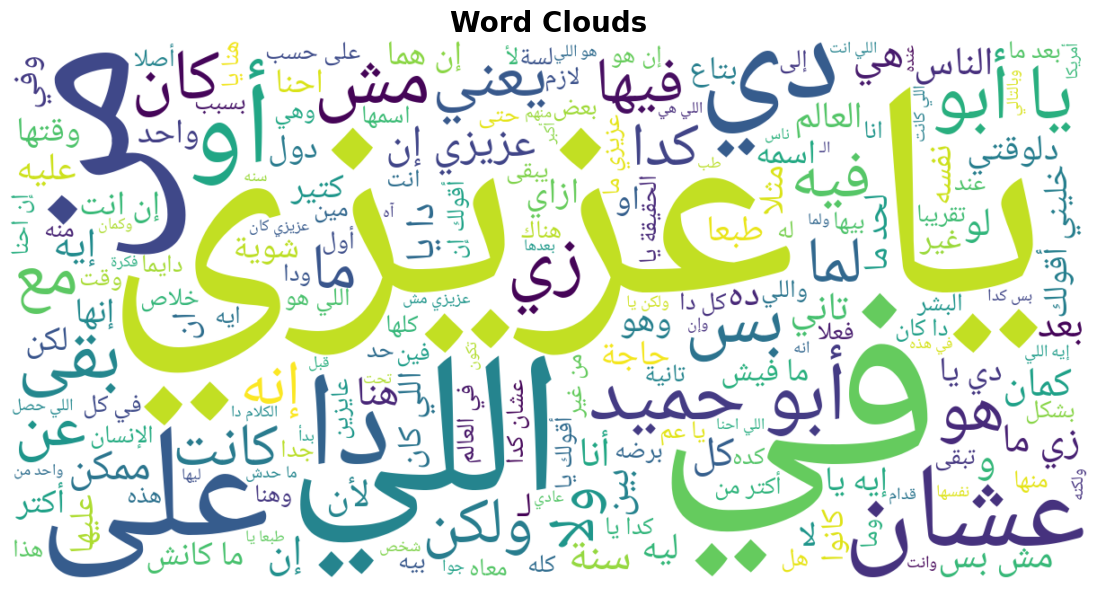

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

# Path to Arabic font
font_path = "/usr/share/fonts/opentype/noto/NotoNaskhArabic-Regular.ttf"  # For Colab/Linux
# font_path = "Amiri-Regular.ttf"  # Use this if you uploaded an Arabic font manually

# Merge all normalized text from all files
all_text = " ".join(df_grouped["Content"])

# Reshape Arabic text and fix word order (Right to Left)
reshaped_text = arabic_reshaper.reshape(all_text)
final_text = get_display(reshaped_text[::-1])  # Reverse text for correct RTL display

# Generate Word Cloud (with RTL fix)
wordcloud = WordCloud(
    font_path=font_path,
    width=1200,
    height=600,
    background_color="white",
    max_words=200,
    colormap="viridis",
    relative_scaling=0.5
).generate(final_text)

# Display the word cloud (Arabic RTL)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Clouds", fontsize=20, fontweight='bold')  # Arabic title
plt.show()


Cleaning

Preprocessing

Normalize Data

In [10]:
import re
import nltk

# Function to normalize
def normalize_text(text):
    if not isinstance(text, str):  # Ensure text is a string
        return []



    # Remove timestamps (e.g., 123.456)
    text = re.sub(r'\b\d+\.\d+\b', '', text)

 # Remove punctuation and special characters (except Arabic letters and spaces)
    text = re.sub(r'[\"();:،.-]', '', text)  # Remove ", (), ;, :

    # Normalize Arabic letters
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ي", text)
    text = re.sub("ة", "ه", text)

    # Tokenize the cleaned text
    #tokens = nltk.word_tokenize(text)

    return text  # Return a list of tokens


In [11]:
df_cleaned = df_grouped.copy()  # Create a new copy to preserve the original
df_cleaned["Normalized"] = df_cleaned["Content"].apply(normalize_text)

# Display the first few rows
df_cleaned[["Filename", "Normalized"]]

Filename  \
0                                 Chat GPT  الدحيح.txt   
1                              Oppenheimer  الدحيح.txt   
2                        آخر يوم في العالم  الدحيح.txt   
3                      أحلى برجر في العالم  الدحيح.txt   
4                               أحمد عدوية  الدحيح.txt   
..                                                 ...   
140                                هانيبال  الدحيح.txt   
141  هل يمكن أن تصل درجة الحرارة في الرياض وبغداد إ...   
142                 يوم في حياة رائـد فضاء  الدحيح.txt   
143                        يوم قيامة النجم  الدحيح.txt   
144                                      😂  الدحيح.txt   

                                            Normalized  
0     [موسيقي]  [موسيقي]  عمي بسيوني الايام يا راجل...  
1     طبعًا يا جون انت مستغرب احنا خاظفينك ليه!  لا...  
2     انتم عارفين يا جماعه؟ احنا بقالنا 13 يوم مع ب...  
3     ايوه يا ماما  واحشاني يا ست الكل والله  الغرب...  
4     [موسيقي]  راح فين يا فندم  شايفني بدور  احنا ...  
..                                                 ...  
140   اوه ماركينوس لم اعُد استطيع النوم  من فرط قلق...  
141   ياه يا بحر!  انا تعبان اوي يا بحر!  تعبان!  ت...  
142   ايه يا جماعه؟ احنا مش كنا خلصنا من القصه دي؟!...  
143   كلنا بتشوف الشمس كل يوم بس محدش يعرف اصل  الش...  
144   قلب ازرق؟! ازرق؟! ايه القرف دا؟!  قرف؟!  وانا...  

[145 rows x 2 columns]

Remove StopWords

In [12]:
import nltk
from nltk.corpus import stopwords

# Download Arabic stopwords if not already downloaded
nltk.download("stopwords")

# Load Arabic stopwords
arabic_stopwords = set(stopwords.words("arabic"))

# Function to remove stopwords
def remove_stopwords(text):
    if not isinstance(text, str):  # Ensure input is a string
        return ""

    tokens = text.split()  # Split text into words (tokenization)
    tokens = [word for word in tokens if word not in arabic_stopwords]  # Remove stopwords

    return " ".join(tokens)  # Convert list back to string


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(arabic_stopwords)

{'لي', 'هلم', 'ليرة', 'أول', 'ل', 'ستمائة', 'بكن', 'غير', 'ثمانون', 'ذه', 'ي', 'ذلكم', 'ذواتي', 'ثلاثمائة', 'انقلب', 'أنا', 'وهو', 'أسكن', 'مازال', 'أنى', 'إلَيْكَ', 'أجل', 'سبعمئة', 'أرى', 'ض', 'حبيب', 'أعلم', 'يا', 'بعد', 'الذي', 'ّأيّان', 'فبراير', 'طالما', 'جانفي', 'أبو', 'رابع', 'بيد', 'آنفا', 'ؤ', 'لعلَّ', 'مكانَك', 'ر', 'مائة', 'إي', 'أخبر', 'بغتة', 'اللاتي', 'ستمئة', 'لم', 'يفعلان', 'واحد', 'هَاتِه', 'دينار', 'شتان', 'كم', 'طرا', 'حدَث', 'أقبل', 'إنا', 'شبه', 'عما', 'غين', 'تجاه', 'ذ', 'هاتي', 'تعسا', 'جيم', 'قطّ', 'مئة', 'سين', 'سبعين', 'ست', 'تلكم', 'أكتوبر', 'خ', 'دواليك', 'أمس', 'ت', 'إذن', 'أوّهْ', 'مثل', 'ذَيْنِ', 'لا سيما', 'أعطى', 'ما انفك', 'هيهات', 'كِخ', 'ومن', 'حجا', 'خلافا', 'شين', 'ذو', 'أجمع', 'تسعون', 'كذلك', 'عشرة', 'والذي', 'خلا', 'لسن', 'مرّة', 'طفق', 'صاد', 'واو', 'اثنين', 'وإذا', 'إليكنّ', 'أُفٍّ', 'إذاً', 'آي', 'بعض', 'ذواتا', 'عسى', 'ديسمبر', 'تين', 'حين', 'ذِي', 'لكنما', 'هَاتانِ', 'هنالك', 'بنا', 'أنتن', 'خامس', 'تانِ', 'هناك', 'حيثما', 'مكانكنّ', 'هاهن

In [13]:
# To be checked
import re

# Custom Arabic stopwords list from kaggle
custom_stopwords = set("""
 اللي فى في كل لم لن له من هو هي قوة كما لها منذ وقد ولا نفسه لقاء مقابل هناك وقال وكان نهاية وقالت وكانت للامم فيه كلم لكن وفي وقف ولم ومن وهو وهي يوم فيها منها مليار لوكالة يكون يمكن مليون حيث اكد الا اما امس السابق التى التي اكثر ايار ايضا ثلاثة الذاتي الاخيرة الثاني الثانية الذى الذي الان امام ايام خلال حوالى الذين الاول الاولى بين ذلك دون حول حين الف الى انه اول ضمن انها جميع الماضي الوقت المقبل اليوم ـ ف و و6 قد لا ما مع مساء هذا واحد واضاف واضافت فان قبل قال كان لدى نحو هذه وان واكد كانت واوضح مايو ب ا أ ، عشر عدد عدة عشرة عدم عام عاما عن عند عندما على علي عليها زيارة سنة سنوات تم ضد بعد بعض اعادة اعلنت بسبب حتى اذا احد اثر برس باسم غدا شخصا صباح اطار اربعة اخرى بان اجل غير بشكل حاليا بن به ثم اف ان او اي بها صفر بس ده ايه لان
""".split())  # Convert string to set

# Function to remove stopwords
def remove_custom_stopwords(text):
    """Remove custom Arabic stopwords from normalized text."""
    if not isinstance(text, str):  # Ensure input is a string
        return ""

    tokens = text.split()  # Tokenize by splitting words
    tokens = [word for word in tokens if word not in custom_stopwords]  # Remove stopwords

    return " ".join(tokens)  # Convert list back to string



In [14]:
# Apply stopword removal to the already normalized text
df_cleaned["Normalized"] = df_cleaned["Normalized"].apply(remove_custom_stopwords)

# Display the first few rows
df_cleaned[["Filename", "Normalized"]]

Filename  \
0                                 Chat GPT  الدحيح.txt   
1                              Oppenheimer  الدحيح.txt   
2                        آخر يوم في العالم  الدحيح.txt   
3                      أحلى برجر في العالم  الدحيح.txt   
4                               أحمد عدوية  الدحيح.txt   
..                                                 ...   
140                                هانيبال  الدحيح.txt   
141  هل يمكن أن تصل درجة الحرارة في الرياض وبغداد إ...   
142                 يوم في حياة رائـد فضاء  الدحيح.txt   
143                        يوم قيامة النجم  الدحيح.txt   
144                                      😂  الدحيح.txt   

                                            Normalized  
0    [موسيقي] [موسيقي] عمي بسيوني الايام يا راجل طي...  
1    طبعًا يا جون انت مستغرب احنا خاظفينك ليه! والل...  
2    انتم عارفين يا جماعه؟ احنا بقالنا 13 محبوسين ا...  
3    ايوه يا ماما واحشاني يا ست الكل والله الغربه ص...  
4    [موسيقي] راح فين يا فندم شايفني بدور احنا لقين...  
..                                                 ...  
140  اوه ماركينوس اعُد استطيع النوم فرط قلقي روما و...  
141  ياه يا بحر! انا تعبان اوي يا بحر! تعبان! تعبان...  
142  يا جماعه؟ احنا مش كنا خلصنا القصه دي؟! بقالنا ...  
143  كلنا بتشوف الشمس محدش يعرف اصل الشمس انت انا ه...  
144  قلب ازرق؟! ازرق؟! القرف دا؟! قرف؟! وانا مالي ا...  

[145 rows x 2 columns]

In [15]:
import re

# Custom Arabic stopwords list
custom_words = set("""
[موسيقي]
""".split())  # Convert string to set

# Function to remove stopwords
def remove_custom_words(text):
    if not isinstance(text, str):  # En sure input is a string
        return ""
    tokens = text.split()  # Tokenize by splitting words
    tokens = [word for word in tokens if word not in custom_words]  # Remove stopwords

    return " ".join(tokens)  # Convert list back to string

In [16]:
# Apply stopword removal to the already normalized text
df_cleaned["Normalized"] = df_cleaned["Normalized"].apply(remove_custom_words)

# Display the first few rows
df_cleaned[["Filename", "Normalized"]]

Filename  \
0                                 Chat GPT  الدحيح.txt   
1                              Oppenheimer  الدحيح.txt   
2                        آخر يوم في العالم  الدحيح.txt   
3                      أحلى برجر في العالم  الدحيح.txt   
4                               أحمد عدوية  الدحيح.txt   
..                                                 ...   
140                                هانيبال  الدحيح.txt   
141  هل يمكن أن تصل درجة الحرارة في الرياض وبغداد إ...   
142                 يوم في حياة رائـد فضاء  الدحيح.txt   
143                        يوم قيامة النجم  الدحيح.txt   
144                                      😂  الدحيح.txt   

                                            Normalized  
0    عمي بسيوني الايام يا راجل طيب دلوقتي افتكرت عم...  
1    طبعًا يا جون انت مستغرب احنا خاظفينك ليه! والل...  
2    انتم عارفين يا جماعه؟ احنا بقالنا 13 محبوسين ا...  
3    ايوه يا ماما واحشاني يا ست الكل والله الغربه ص...  
4    راح فين يا فندم شايفني بدور احنا لقينا مارادون...  
..                                                 ...  
140  اوه ماركينوس اعُد استطيع النوم فرط قلقي روما و...  
141  ياه يا بحر! انا تعبان اوي يا بحر! تعبان! تعبان...  
142  يا جماعه؟ احنا مش كنا خلصنا القصه دي؟! بقالنا ...  
143  كلنا بتشوف الشمس محدش يعرف اصل الشمس انت انا ه...  
144  قلب ازرق؟! ازرق؟! القرف دا؟! قرف؟! وانا مالي ا...  

[145 rows x 2 columns]

N-grams after cleaning

Bigrams

In [ ]:
# Function to tokenize text and extract bigrams
def get_bigrams(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
    bigram_list = list(bigrams(tokens))  # Generate bigrams
    return bigram_list

# Apply the function to each file's content
df_cleaned["Bigrams"] = df_cleaned["Normalized"].apply(get_bigrams)

# Flatten all bigrams across all files
all_bigrams = [bigram for bigram_list in df_cleaned["Bigrams"] for bigram in bigram_list]

# Count most common bigrams
bigram_counts = Counter(all_bigrams)

# Display the top 10 bigrams
print("Top 10 Bigrams:")
for bigram, count in bigram_counts.most_common(10):
    print(f"{bigram}: {count}")


Top 10 Bigrams:
('يا', 'عزيزي'): 8277
('يا', 'ابو'): 1733
('ابو', 'حميد'): 1439
('دا', 'يا'): 609
('!', 'يا'): 531
('ابو', 'حميد؟'): 521
('!', 'دا'): 484
('خلّيني', 'اقولّك'): 418
('!', 'انا'): 399
('دي', 'يا'): 381


In [ ]:
bigram_counts.most_common()

[(('يا', 'عزيزي'), 8277),
 (('يا', 'ابو'), 1733),
 (('ابو', 'حميد'), 1439),
 (('دا', 'يا'), 609),
 (('!', 'يا'), 531),
 (('ابو', 'حميد؟'), 521),
 (('!', 'دا'), 484),
 (('خلّيني', 'اقولّك'), 418),
 (('!', 'انا'), 399),
 (('دي', 'يا'), 381),
 (('كدا', 'يا'), 335),
 (('ايه؟', '!'), 322),
 (('!', 'انت'), 317),
 (('عشان', 'كدا'), 309),
 (('حميد', '!'), 303),
 (('هنا', 'يا'), 239),
 (('الحقيقه', 'يا'), 221),
 (('اقولّك', 'يا'), 221),
 (('عزيزي', 'مش'), 212),
 (('!', 'مش'), 210),
 (('ولكن', 'يا'), 207),
 (('يا', 'عم'), 206),
 (('الله', '!'), 206),
 (('حميد؟', '!'), 203),
 (('انا', 'مش'), 200),
 (('يا', 'جماعه'), 194),
 (('دا؟', '!'), 190),
 (('طبعًا', 'يا'), 176),
 (('الكلام', 'دا'), 173),
 (('!', 'خلّيني'), 172),
 (('شاء', 'الله'), 169),
 (('حتي', 'لو'), 168),
 (('بقي', 'يا'), 166),
 (('عزيزي', 'انت'), 161),
 (('حسب', 'كلام'), 154),
 (('خُد', 'بالك'), 154),
 (('الراجل', 'دا'), 152),
 (('!', 'يعني'), 151),
 (('!', 'عزيزي'), 149),
 (('عزيزي', 'دا'), 147),
 (('عزيزي', 'لو'), 147),
 (('الحرب', '

Trigrams

In [ ]:
import nltk
from nltk import trigrams
from collections import Counter

# Function to tokenize text and extract trigrams
def get_trigrams(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
    trigram_list = list(trigrams(tokens))  # Generate trigrams
    return trigram_list

# Apply the function to each file's content
df_cleaned["Trigrams"] = df_cleaned["Normalized"].apply(get_trigrams)

# Flatten all trigrams across all files
all_trigrams = [trigram for trigram_list in df_cleaned["Trigrams"] for trigram in trigram_list]

# Count most common trigrams
trigram_counts = Counter(all_trigrams)

# Display the top 10 trigrams
print("Top 10 Trigrams:")
for trigram, count in trigram_counts.most_common(10):
    print(f"{trigram}: {count}")


Top 10 Trigrams:
('يا', 'ابو', 'حميد'): 1164
('يا', 'ابو', 'حميد؟'): 520
('دا', 'يا', 'عزيزي'): 500
('دي', 'يا', 'عزيزي'): 339
('ابو', 'حميد', '!'): 303
('كدا', 'يا', 'عزيزي'): 273
('هنا', 'يا', 'عزيزي'): 228
('اقولّك', 'يا', 'عزيزي'): 221
('الحقيقه', 'يا', 'عزيزي'): 218
('ابو', 'حميد؟', '!'): 203


Quadgrams

In [ ]:
import nltk
from nltk import ngrams
from collections import Counter

# Function to tokenize text and extract quadgrams
def get_quadgrams(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and lowercase
    quadgram_list = list(ngrams(tokens, 4))  # Generate quadgrams
    return quadgram_list

# Apply the function to each file's content
df_cleaned["Quadgrams"] = df_cleaned["Normalized"].apply(get_quadgrams)

# Flatten all quadgrams across all files
all_quadgrams = [quadgram for quadgram_list in df_cleaned["Quadgrams"] for quadgram in quadgram_list]

# Count most common quadgrams
quadgram_counts = Counter(all_quadgrams)

# Display the top 10 quadgrams
print("Top 10 Quadgrams:")
for quadgram, count in quadgram_counts.most_common(10):
    print(f"{quadgram}: {count}")


Top 10 Quadgrams:
('يا', 'ابو', 'حميد', '!'): 297
('يا', 'ابو', 'حميد؟', '!'): 202
('خلّيني', 'اقولّك', 'يا', 'عزيزي'): 184
('السلام', 'عليكم', 'ورحمه', 'الله'): 120
('عليكم', 'ورحمه', 'الله', 'وبركاته'): 120
('المشاهدين', 'السلام', 'عليكم', 'ورحمه'): 115
('بكم', 'حلقه', 'جديده', 'برنامج'): 115
('اعزايي', 'المشاهدين', 'السلام', 'عليكم'): 114
('ورحمه', 'الله', 'وبركاته', 'اهلًا'): 107
('الله', 'وبركاته', 'اهلًا', 'بكم'): 101


Word Cloud

In [ ]:
#!pip install wordcloud arabic-reshaper matplotlib

In [ ]:
#!pip install python-bidi

In [ ]:
#!apt-get install fonts-noto -y

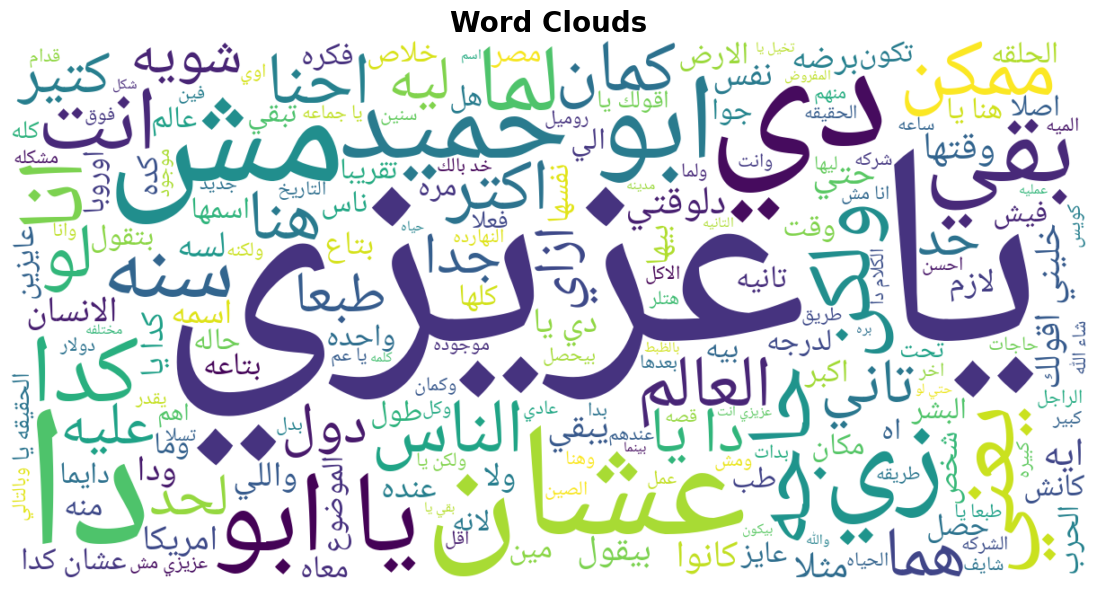

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

# Path to Arabic font
font_path = "/usr/share/fonts/opentype/noto/NotoNaskhArabic-Regular.ttf"  # For Colab/Linux
# font_path = "Amiri-Regular.ttf"  # Use this if you uploaded an Arabic font manually

# Merge all normalized text from all files
all_text = " ".join(df_cleaned["Normalized"])

# Reshape Arabic text and fix word order (Right to Left)
reshaped_text = arabic_reshaper.reshape(all_text)
final_text = get_display(reshaped_text[::-1])  # Reverse text for correct RTL display

# Generate Word Cloud (with RTL fix)
wordcloud = WordCloud(
    font_path=font_path,
    width=1200,
    height=600,
    background_color="white",
    max_words=200,
    colormap="viridis",
    relative_scaling=0.5
).generate(final_text)

# Display the word cloud (Arabic RTL)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Clouds", fontsize=20, fontweight='bold')  # Arabic title
plt.show()


In [17]:
# To be checked
import re

# Custom Arabic stopwords list from kaggle
custom_stopwords = set("""
 اللي فى في كل لم لن له من هو هي قوة كما لها منذ وقد ولا نفسه لقاء مقابل هناك وقال وكان نهاية وقالت وكانت للامم فيه كلم لكن وفي وقف ولم ومن وهو وهي يوم فيها منها مليار لوكالة يكون يمكن مليون حيث اكد الا اما امس السابق التى التي اكثر ايار ايضا ثلاثة الذاتي الاخيرة الثاني الثانية الذى الذي الان امام ايام خلال حوالى الذين الاول الاولى بين ذلك دون حول حين الف الى انه اول ضمن انها جميع الماضي الوقت المقبل اليوم ـ ف و و6 قد لا ما مع مساء هذا واحد واضاف واضافت فان قبل قال كان لدى نحو هذه وان واكد كانت واوضح مايو ب ا أ ، عشر عدد عدة عشرة عدم عام عاما عن عند عندما على علي عليها زيارة سنة سنوات تم ضد بعد بعض اعادة اعلنت بسبب حتى اذا احد اثر برس باسم غدا شخصا صباح اطار اربعة اخرى بان اجل غير بشكل حاليا بن به ثم اف ان يا دا بقي كده مش في ومش هنا بينما اه و ولكن انت وكده اهم هل وانت لانه ولا وحد منه مره اوي فعلا الي والي واللي وبقي وهنا وما كلها طبعا لسه معاه دي او اي بها صفر بس ده ايه لان
""".split())  # Convert string to set

# Function to remove stopwords
def remove_custom_stopwords(text):
    """Remove custom Arabic stopwords from normalized text."""
    if not isinstance(text, str):  # Ensure input is a string
        return ""

    tokens = text.split()  # Tokenize by splitting words
    tokens = [word for word in tokens if word not in custom_stopwords]  # Remove stopwords

    return " ".join(tokens)  # Convert list back to string



In [18]:
# Apply stopword removal to the already normalized text
df_cleaned["Normalized_new"] = df_cleaned["Normalized"].apply(remove_custom_stopwords)

# Display the first few rows
df_cleaned[["Filename", "Normalized_new"]]

Filename  \
0                                 Chat GPT  الدحيح.txt   
1                              Oppenheimer  الدحيح.txt   
2                        آخر يوم في العالم  الدحيح.txt   
3                      أحلى برجر في العالم  الدحيح.txt   
4                               أحمد عدوية  الدحيح.txt   
..                                                 ...   
140                                هانيبال  الدحيح.txt   
141  هل يمكن أن تصل درجة الحرارة في الرياض وبغداد إ...   
142                 يوم في حياة رائـد فضاء  الدحيح.txt   
143                        يوم قيامة النجم  الدحيح.txt   
144                                      😂  الدحيح.txt   

                                        Normalized_new  
0    عمي بسيوني الايام راجل طيب دلوقتي افتكرت عم بس...  
1    طبعًا جون مستغرب احنا خاظفينك ليه! والله كتر خ...  
2    انتم عارفين جماعه؟ احنا بقالنا 13 محبوسين الغو...  
3    ايوه ماما واحشاني ست الكل والله الغربه صعبه جد...  
4    راح فين فندم شايفني بدور احنا لقينا مارادونا ف...  
..                                                 ...  
140  اوه ماركينوس اعُد استطيع النوم فرط قلقي روما و...  
141  ياه بحر! انا تعبان بحر! تعبان! تعبان! قلبي مكس...  
142  جماعه؟ احنا كنا خلصنا القصه دي؟! بقالنا 12 سيش...  
143  كلنا بتشوف الشمس محدش يعرف اصل الشمس انا هعمل ...  
144  قلب ازرق؟! ازرق؟! القرف دا؟! قرف؟! وانا مالي ا...  

[145 rows x 2 columns]

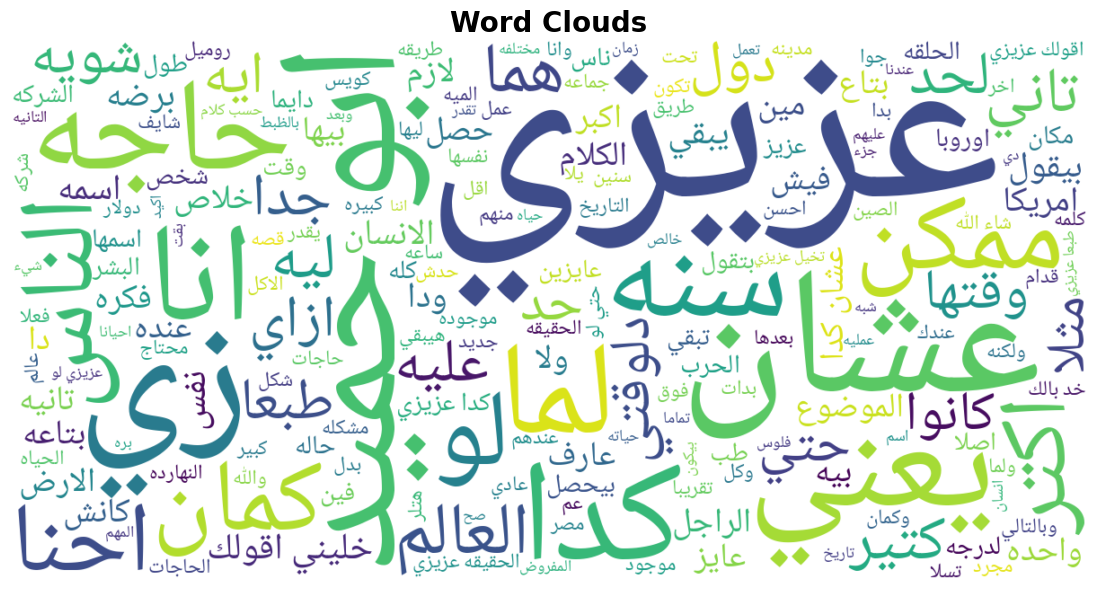

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import arabic_reshaper
from bidi.algorithm import get_display

# Path to Arabic font
font_path = "/usr/share/fonts/opentype/noto/NotoNaskhArabic-Regular.ttf"  # For Colab/Linux
# font_path = "Amiri-Regular.ttf"  # Use this if you uploaded an Arabic font manually

# Merge all normalized text from all files
all_text = " ".join(df_cleaned["Normalized_new"])

# Reshape Arabic text and fix word order (Right to Left)
reshaped_text = arabic_reshaper.reshape(all_text)
final_text = get_display(reshaped_text[::-1])  # Reverse text for correct RTL display

# Generate Word Cloud (with RTL fix)
wordcloud = WordCloud(
    font_path=font_path,
    width=1200,
    height=600,
    background_color="white",
    max_words=200,
    colormap="viridis",
    relative_scaling=0.5
).generate(final_text)

# Display the word cloud (Arabic RTL)
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Clouds", fontsize=20, fontweight='bold')  # Arabic title
plt.show()


In [ ]:
!pip install transformers

NER

In [ ]:
from transformers import pipeline, AutoTokenizer

# Load Arabic NER model
ner_pipeline = pipeline("ner", model="hatmimoha/arabic-ner", aggregation_strategy="simple")

# Load tokenizer (ensures proper token splitting)
tokenizer = AutoTokenizer.from_pretrained("hatmimoha/arabic-ner")

# Function to apply NER on long text by splitting into token-sized chunks
def extract_named_entities(text, max_length=512):
    tokens = tokenizer(text, truncation=True, padding="max_length", max_length=max_length, return_tensors="pt")  # Truncate properly
    decoded_text = tokenizer.decode(tokens["input_ids"][0], skip_special_tokens=True)  # Convert tokens back to text

    # Apply NER on truncated text
    entities = ner_pipeline(decoded_text)

    # Extract named entities
    extracted_entities = [(entity["word"], entity["entity_group"]) for entity in entities]

    return extracted_entities

# Apply NER to each document in the DataFrame
df_cleaned["Named_Entities"] = df_cleaned["Normalized_new"].apply(extract_named_entities)

# Display results
df_cleaned[["Filename", "Named_Entities"]].head(10)


Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Filename  \
0                  Chat GPT  الدحيح.txt   
1               Oppenheimer  الدحيح.txt   
2         آخر يوم في العالم  الدحيح.txt   
3       أحلى برجر في العالم  الدحيح.txt   
4                أحمد عدوية  الدحيح.txt   
5            أخطر رجل مافيا  الدحيح.txt   
6            أخطر من النووي  الدحيح.txt   
7  أشهر ملاهي في كوكب الارض  الدحيح.txt   
8         أعداد لا وجود لها  الدحيح.txt   
9  أغرب قصة صعود في التاريخ  الدحيح.txt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Named_Entities  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      [(بسي, PERSON), (##وني, PERSON), (راج, PERSON), (##ل, PERSON), (بسي, PERSON), (##وني, PERSON), (بسي, PERSON), (بسي, PERSON), (##وني, PERSON), (##ل, PERSON), (ابريل, DATE), (1986, DATE), (واشنطن, LOCATION), (بريطانيا, LOCATION), (الخمسين, DATE), (##يات, DATE)]  
1                                                                                                                                                                                                                                                                                                                                                             [(جون, PERSON), (صحراء, LOCATION), (اري, LOCATION), (##زونا, LOCATION), (2 اغسطس سنه 1939, DATE), (فران, PERSON), (##كل, PERSON), (##ين روزفيلت, PERSON), (البرت اينشتاين, PERSON), (روز, PERSON), (##فيل, PERSON), (اين, PERSON), (##شتاين, PERSON), (فري, PERSON), (##تز شتراسمان, PERSON), (واو, PERSON), (##تو هان, PERSON), (19, DATE), (هت, PERSON), (##لر, PERSON), (اين, PERSON), (##شتاين, PERSON)]  
2                                                                                                                                                                                                                                                                                                            [(حسني, PERSON), (##نو, PERSON), (##ف, PERSON), (عوف, PERSON), (حسني, PERSON), (##نو, PERSON), (رامز, PERSON), (4 اكتوبر 1957, DATE), (امريكا, ORGANIZATION), (والاتحاد السوفييتي, ORGANIZATION), (ابو حميد, PERSON), (ليفربول, ORGANIZATION), (صلاح, PERSON), (##امر, LOCATION), (##يكا, LOCATION), (لـ, LOCATION), (##امر, ORGANIZATION), (##يكا, ORGANIZATION), (موسكو, ORGANIZATION), (##واشنطن, ORGANIZATION), (اوروبا, LOCATION), (ابو حميد, LOCATION)]  
3                                                                                                                                                                                 [(عبد الجليل, PERSON), (حلق, PRODUCT), (##ه النهارده, PRODUCT), (الحب الحقيقي, PRODUCT), (ابو, PERSON), (حميد, PRODUCT), (ماكدونالد, ORGANIZATION), (##ز, ORGANIZATION), (داف, PERSON), (##يد موريس, PERSON), (وهي, PERSON), (##لين ستيل, PERSON), (ماكدونالد, ORGANIZATION), (##ز, ORGANIZATION), (ماكدونالد, ORGANIZATION), (##لز, ORGANIZATION), (ماكدونالد, ORGANIZATION), (##ز, ORGANIZATI

In [ ]:
#!pip install scikit-learn

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Apply TF-IDF
vectorizer = TfidfVectorizer(max_features=20)  # Use top 20 words per document
tfidf_matrix = vectorizer.fit_transform(df_cleaned["Normalized_new"])

# Convert TF-IDF Output into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display TF-IDF Results
print("\nTop TF-IDF Words per Document:")
print(tfidf_df)

# Find the Most Important Words (Highest TF-IDF Score) per Document
df_cleaned["Top TF-IDF Words"] = tfidf_df.apply(lambda row: row.nlargest(5).index.tolist(), axis=1)

# Display final dataset with top TF-IDF words
df_cleaned[["Normalized_new", "Top TF-IDF Words"]]



Top TF-IDF Words per Document:
          ابو      احنا      اكتر    العالم     الناس       انا        جد  \
0    0.147555  0.088501  0.073272  0.000000  0.073272  0.119729  0.000000   
1    0.089735  0.172230  0.163388  0.278635  0.103974  0.235776  0.068730   
2    0.224093  0.172042  0.022256  0.371106  0.077895  0.238981  0.051491   
3    0.168882  0.063027  0.055909  0.009711  0.027954  0.139210  0.107791   
4    0.344354  0.208713  0.089999  0.000000  0.233998  0.252105  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
140  0.122754  0.144987  0.018756  0.087960  0.028134  0.131347  0.151877   
141  0.209720  0.286000  0.109623  0.057122  0.054812  0.245661  0.164855   
142  0.241469  0.166843  0.076741  0.039988  0.028778  0.152268  0.122063   
143  0.219997  0.150802  0.078032  0.065058  0.093639  0.160295  0.000000   
144  0.272727  0.087242  0.056429  0.152901  0.033857  0.326676  0.065277   

         حاجه      حميد        خل        زي

Normalized_new  \
0    عمي بسيوني الايام راجل طيب دلوقتي افتكرت عم بس...   
1    طبعًا جون مستغرب احنا خاظفينك ليه! والله كتر خ...   
2    انتم عارفين جماعه؟ احنا بقالنا 13 محبوسين الغو...   
3    ايوه ماما واحشاني ست الكل والله الغربه صعبه جد...   
4    راح فين فندم شايفني بدور احنا لقينا مارادونا ف...   
..                                                 ...   
140  اوه ماركينوس اعُد استطيع النوم فرط قلقي روما و...   
141  ياه بحر! انا تعبان بحر! تعبان! تعبان! قلبي مكس...   
142  جماعه؟ احنا كنا خلصنا القصه دي؟! بقالنا 12 سيش...   
143  كلنا بتشوف الشمس محدش يعرف اصل الشمس انا هعمل ...   
144  قلب ازرق؟! ازرق؟! القرف دا؟! قرف؟! وانا مالي ا...   

                   Top TF-IDF Words  
0       [عزيزي, عشان, لو, حاجه, زي]  
1     [عزيزي, زي, العالم, سنه, انا]  
2    [عزيزي, العالم, انا, ابو, كدا]  
3        [عزيزي, كدا, عشان, لم, لو]  
4      [عزيزي, زي, ابو, انا, الناس]  
..                              ...  
140      [عزيزي, كدا, عشان, لو, جد]  
141  [عزيزي, احنا, ممكن, عشان, انا]  
142  [عزيزي, كدا, عشان, حميد, ممكن]  
143    [عزيزي, زي, ممكن, سنه, حاجه]  
144      [عزيزي, زي, انا, كدا, ابو]  

[145 rows x 2 columns]

In [21]:
from sklearn.cluster import KMeans

# Choose the number of clusters (you can experiment with different values)
num_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_cleaned["Cluster"] = kmeans.fit_predict(tfidf_matrix)

# Show clustered data
df_cleaned[["Filename", "Cluster"]]


Filename  Cluster
0                                 Chat GPT  الدحيح.txt        2
1                              Oppenheimer  الدحيح.txt        4
2                        آخر يوم في العالم  الدحيح.txt        0
3                      أحلى برجر في العالم  الدحيح.txt        4
4                               أحمد عدوية  الدحيح.txt        2
..                                                 ...      ...
140                                هانيبال  الدحيح.txt        4
141  هل يمكن أن تصل درجة الحرارة في الرياض وبغداد إ...        0
142                 يوم في حياة رائـد فضاء  الدحيح.txt        0
143                        يوم قيامة النجم  الدحيح.txt        2
144                                      😂  الدحيح.txt        0

[145 rows x 2 columns]

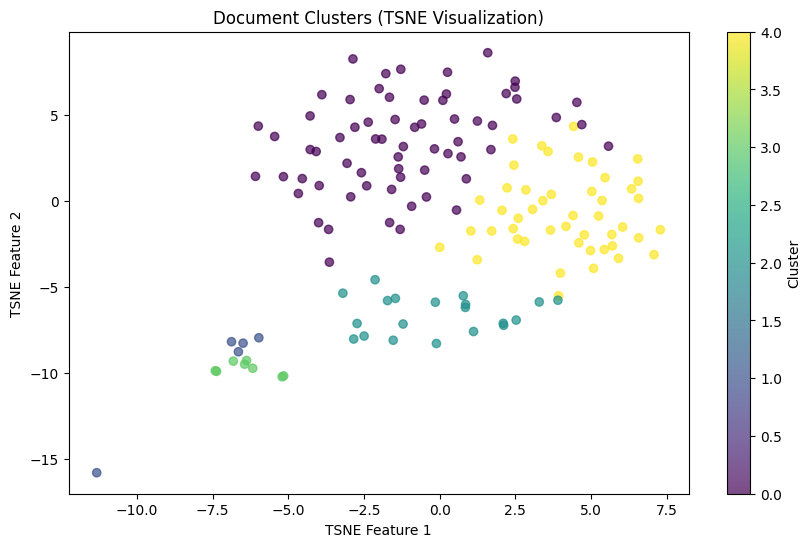

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce dimensions to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df_cleaned["Cluster"], cmap="viridis", alpha=0.7)
plt.colorbar(label="Cluster")
plt.title("Document Clusters (TSNE Visualization)")
plt.xlabel("TSNE Feature 1")
plt.ylabel("TSNE Feature 2")
plt.show()


In [22]:
# Get top words per cluster
def get_top_keywords(model, vectorizer, n_words=30):
    feature_names = vectorizer.get_feature_names_out()
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]

    for cluster_num in range(model.n_clusters):
        top_words = [feature_names[i] for i in order_centroids[cluster_num, :n_words]]
        print(f"Cluster {cluster_num}: {', '.join(top_words)}")

# Print top words for each cluster
get_top_keywords(kmeans, vectorizer)


Cluster 0: عزيزي, كدا, عشان, زي, ابو, حميد, انا, لو, لم, يعني, سنه, حاجه, خل, ممكن, احنا, جد, العالم, الناس, كمان, اكتر
Cluster 1: انا, حاجه, لو, عشان, كمان, يعني, ممكن, ابو, عزيزي, احنا, سنه, الناس, زي, حميد, كدا, جد, لم, العالم, اكتر, خل
Cluster 2: عزيزي, عشان, انا, زي, لو, يعني, احنا, سنه, ابو, حاجه, ممكن, حميد, الناس, كمان, اكتر, العالم, جد, كدا, لم, خل
Cluster 3: انا, احنا, عشان, يعني, حاجه, لو, زي, الناس, ممكن, كمان, العالم, سنه, اكتر, عزيزي, خل, جد, حميد, كدا, لم, ابو
Cluster 4: عزيزي, كدا, زي, عشان, انا, ابو, لو, حميد, لم, حاجه, يعني, سنه, احنا, خل, جد, ممكن, الناس, اكتر, العالم, كمان


In [23]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity

# ============================ TF-IDF VECTORIZATION ============================
# Arabic Stopwords List (Expanded for Better Filtering)

custom_stopwords = [
    "انا", "ازاي", "حد","عزيز", "ليه", "عشان", "عايز","عزيزي", "حاجه", "لو", "عشان", "ممكن", "زي", "كدا", "جد", "احنا", "لم",
    "هو", "هي", "في", "من", "على", "إلى", "لك", "انت", "اللي", "ه", "ر", "ق", "ول",
    "جدا", "يلا", "لما", "مثلا", "كمان", "اي", "ايه", "الناس", "كل", "بس",
    "احنا","لي","اكتر", "يعني","الج","ابو حميد", "ابو", "حميد", "د", "ل","ي", "ك", "م" ,"ا", "لم", "هو", "هي", "في", "من", "على", "إلى", "لك", "انت"
]

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 3),
    stop_words=custom_stopwords,  # Pass as a list
    token_pattern=r"\b\w+\b",  # Ensures better Arabic tokenization
    norm="l2"
)

X = vectorizer.fit_transform(df_cleaned["Normalized_new"])

# ============================ K-MEANS CLUSTERING ============================
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_cleaned["Cluster_KMeans"] = kmeans.fit_predict(X)

# ============================ DBSCAN CLUSTERING ============================
dbscan = DBSCAN(metric="cosine", eps=0.5, min_samples=3)
df_cleaned["Cluster_DBSCAN"] = dbscan.fit_predict(X.toarray())  # Convert sparse matrix to dense

# ============================ DISPLAY TOP WORDS PER CLUSTER ============================
def get_top_keywords(model, vectorizer, n_words=10):
    feature_names = vectorizer.get_feature_names_out()

    if hasattr(model, "cluster_centers_"):  # Only for K-Means
        order_centroids = model.cluster_centers_.argsort()[:, ::-1]

        for cluster_num in range(model.n_clusters):
            top_words = [feature_names[i] for i in order_centroids[cluster_num, :n_words]]
            print(f"Cluster {cluster_num}: {', '.join(top_words)}")

print("\n==== TOP WORDS PER K-MEANS CLUSTER ====")
get_top_keywords(kmeans, vectorizer)

# ============================ SHOW CLUSTER RESULTS ============================
print("\n==== DOCUMENT CLUSTERING RESULTS ====")
df_cleaned[["Filename", "Cluster_KMeans", "Cluster_DBSCAN"]]



==== TOP WORDS PER K-MEANS CLUSTER ====
Cluster 0: كلوب, رونالدو, كريستيانو, فيرجسون, الكوره, يورجن, النادي, الملعب, يورجن كلوب, يونايتد
Cluster 1: الحرب, خل, سنه, روميل, شركه, امريكا, البطاطس, الملح, العالم, هيس
Cluster 2: القنبله, الطياره, هيروشيما, الفضاء, كلاشنكوف, كوبا, اوبنهايمر, نوويه, قنبله, الذر يه
Cluster 3: الام, بيتهوفن, سنه, الاب, التشريح, الفيل, خل, التوحد, النباتات, اللبن
Cluster 4: سنه, الله, الانسان, العالم, خل, عارف, يبقي, دلوقتي, قوي, لحد

==== DOCUMENT CLUSTERING RESULTS ====


Filename  Cluster_KMeans  \
0                                 Chat GPT  الدحيح.txt               4   
1                              Oppenheimer  الدحيح.txt               2   
2                        آخر يوم في العالم  الدحيح.txt               2   
3                      أحلى برجر في العالم  الدحيح.txt               4   
4                               أحمد عدوية  الدحيح.txt               4   
..                                                 ...             ...   
140                                هانيبال  الدحيح.txt               1   
141  هل يمكن أن تصل درجة الحرارة في الرياض وبغداد إ...               4   
142                 يوم في حياة رائـد فضاء  الدحيح.txt               2   
143                        يوم قيامة النجم  الدحيح.txt               4   
144                                      😂  الدحيح.txt               4   

     Cluster_DBSCAN  
0                -1  
1                -1  
2                -1  
3                -1  
4                -1  
..              ...  
140              -1  
141              -1  
142              -1  
143              -1  
144              -1  

[145 rows x 3 columns]

In [24]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# ============================ TF-IDF VECTORIZATION ============================

# Arabic Stopwords (Optimized for Performance)
custom_stopwords = [
    "انا", "ازاي", "حد", "عزيز", "ليه", "عشان", "عايز", "عزيزي", "حاجه", "لو", "ممكن", "زي", "كدا", "جد", "احنا", "لم",
    "هو", "هي", "في", "من", "على", "إلى", "لك", "انت", "اللي", "ه", "ر", "ق", "ول",
    "جدا", "يلا", "لما", "مثلا", "كمان", "اي", "ايه", "الناس", "كل", "بس",
    "اكتر", "يعني", "الج", "ابو حميد", "ابو", "حميد", "د", "ل", "ي", "ك", "م", "ا"
]

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 3),
    stop_words=custom_stopwords,  # Pass stopwords as a set
    token_pattern=r"\b\w+\b",  # Better Arabic tokenization
    norm="l2"
)

X = vectorizer.fit_transform(df_cleaned["Normalized_new"])

# ============================ K-MEANS CLUSTERING ============================

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_cleaned["Cluster_KMeans"] = kmeans.fit_predict(X)

# ============================ DBSCAN CLUSTERING (Using PCA for Better Results) ============================

# Reduce dimensions before applying DBSCAN
pca = PCA(n_components=50)  # Reduce to 50 components for dense representation
X_pca = pca.fit_transform(X.toarray())

dbscan = DBSCAN(metric="cosine", eps=0.5, min_samples=3)
df_cleaned["Cluster_DBSCAN"] = dbscan.fit_predict(X_pca)

# ============================ DISPLAY TOP WORDS PER CLUSTER ============================

def get_top_keywords(model, vectorizer, n_words=10):
    """Prints the top words per cluster for K-Means."""
    if not hasattr(model, "cluster_centers_"):  # Check if model supports this
        print("This model does not support cluster centroids.")
        return

    feature_names = vectorizer.get_feature_names_out()
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]

    for cluster_num in range(model.n_clusters):
        top_words = [feature_names[i] for i in order_centroids[cluster_num, :n_words]]
        print(f"Cluster {cluster_num}: {', '.join(top_words)}")

print("\n==== TOP WORDS PER K-MEANS CLUSTER ====")
get_top_keywords(kmeans, vectorizer)

# ============================ SHOW CLUSTER RESULTS ============================

print("\n==== DOCUMENT CLUSTERING RESULTS ====")
# print(df_cleaned[["Filename", "Cluster_KMeans", "Cluster_DBSCAN"]].head(70))
df_cleaned[["Filename", "Cluster_KMeans", "Cluster_DBSCAN"]]



==== TOP WORDS PER K-MEANS CLUSTER ====
Cluster 0: كلوب, رونالدو, كريستيانو, فيرجسون, الكوره, يورجن, النادي, الملعب, يورجن كلوب, يونايتد
Cluster 1: خل, سنه, الحرب, هما, امريكا, العالم, روميل, شركه, الملح, يني
Cluster 2: القنبله, الطياره, هيروشيما, الفضاء, كلاشنكوف, كوبا, اوبنهايمر, نوويه, قنبله, الذر يه
Cluster 3: الام, بيتهوفن, الاب, الفيل, التوحد, اللبن, النباتات, الخنزير, سنه, الامهات
Cluster 4: سنه, لي, الله, الانسان, عارف, العالم, يبقي, خل, دلوقتي, قوي

==== DOCUMENT CLUSTERING RESULTS ====


Filename  Cluster_KMeans  \
0                                 Chat GPT  الدحيح.txt               4   
1                              Oppenheimer  الدحيح.txt               2   
2                        آخر يوم في العالم  الدحيح.txt               2   
3                      أحلى برجر في العالم  الدحيح.txt               4   
4                               أحمد عدوية  الدحيح.txt               4   
..                                                 ...             ...   
140                                هانيبال  الدحيح.txt               1   
141  هل يمكن أن تصل درجة الحرارة في الرياض وبغداد إ...               4   
142                 يوم في حياة رائـد فضاء  الدحيح.txt               2   
143                        يوم قيامة النجم  الدحيح.txt               4   
144                                      😂  الدحيح.txt               4   

     Cluster_DBSCAN  
0                 7  
1                 0  
2                 0  
3                 1  
4                -1  
..              ...  
140              -1  
141               5  
142              -1  
143               6  
144              -1  

[145 rows x 3 columns]

In [ ]:
!pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=eab9b51e9a4d95de4b2d67bf7eaf9f26327a08604416c38ed3e5a38de0f9ccd8
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [ ]:
import pandas as pd
import re
from googletrans import Translator

# Initialize translator
translator = Translator()

# Function to detect and translate English words to Arabic
def translate_english_words(text):
    words = text.split()  # Split text into words
    translated_words = []

    for word in words:
        if re.match(r'^[A-Za-z]+$', word):  # Check if the word is English
            try:
                translation = translator.translate(word, src="en", dest="ar").text  # Translate to Arabic
                translated_words.append(translation)
            except Exception as e:
                translated_words.append(word)  # Keep original if translation fails
        else:
            translated_words.append(word)  # Keep Arabic words unchanged

    return " ".join(translated_words)

# Apply translation to the "Content" column
df_cleaned["Translated_Content"] = df_cleaned["Normalized_new"].apply(translate_english_words)

# Display results
df_cleaned[["Content", "Translated_Content"]].head()


Content  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [25]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# ============================ TF-IDF VECTORIZATION ============================

# Arabic Stopwords (Optimized for Performance)
custom_stopwords = [
    "انا", "ازاي", "حد", "عزيز", "ليه", "عشان", "عايز", "عزيزي", "حاجه", "لو", "ممكن", "زي", "كدا", "جد", "احنا", "لم",
    "هو", "هي", "في", "من", "على", "إلى", "لك", "انت", "اللي", "ه", "ر", "ق", "ول",
    "جدا", "يلا", "لما", "مثلا", "كمان", "اي", "ايه", "الناس", "كل", "بس",
    "اكتر", "يعني", "الج", "ابو حميد", "ابو", "حميد", "د", "ل", "ي", "ك", "م", "ا"
]

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 3),
    stop_words=custom_stopwords,  # Pass stopwords as a set
    token_pattern=r"\b\w+\b",  # Better Arabic tokenization
    norm="l2"
)

X = vectorizer.fit_transform(df_cleaned["Translated_Content"])

# ============================ K-MEANS CLUSTERING ============================

num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
df_cleaned["Cluster_KMeans"] = kmeans.fit_predict(X)

# ============================ DBSCAN CLUSTERING (Using PCA for Better Results) ============================

# Reduce dimensions before applying DBSCAN
pca = PCA(n_components=50)  # Reduce to 50 components for dense representation
X_pca = pca.fit_transform(X.toarray())

dbscan = DBSCAN(metric="cosine", eps=0.5, min_samples=3)
df_cleaned["Cluster_DBSCAN"] = dbscan.fit_predict(X_pca)

# ============================ DISPLAY TOP WORDS PER CLUSTER ============================

def get_top_keywords(model, vectorizer, n_words=10):
    """Prints the top words per cluster for K-Means."""
    if not hasattr(model, "cluster_centers_"):  # Check if model supports this
        print("This model does not support cluster centroids.")
        return

    feature_names = vectorizer.get_feature_names_out()
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]

    for cluster_num in range(model.n_clusters):
        top_words = [feature_names[i] for i in order_centroids[cluster_num, :n_words]]
        print(f"Cluster {cluster_num}: {', '.join(top_words)}")

print("\n==== TOP WORDS PER K-MEANS CLUSTER ====")
get_top_keywords(kmeans, vectorizer)

# ============================ SHOW CLUSTER RESULTS ============================

print("\n==== DOCUMENT CLUSTERING RESULTS ====")
# print(df_cleaned[["Filename", "Cluster_KMeans", "Cluster_DBSCAN"]].head(70))
df_cleaned[["Filename", "Cluster_KMeans", "Cluster_DBSCAN"]]


KeyError: 'Translated_Content'

In [26]:
import os
import json
import pandas as pd

# Path to folder containing annotation files
folder_path = "/content/content/Da7ee7/Annotations"

# List to store extracted data
annotations_data = []

# Loop through all JSON files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".json"):  # Ensure we only read JSON files
        file_path = os.path.join(folder_path, filename)

        with open(file_path, "r", encoding="utf-8") as file:
            annotation = json.load(file)  # Load JSON content

            # Extract needed fields
            annotations_data.append({
                "Filename": filename.replace(".json", ""),  # Remove .json extension
                "Number_of_Likes": annotation.get("Number_of_Likes", 0),  # Default to 0 if missing
                "Number_of_Views": annotation.get("Number_of_Views", 0),
                "Number_of_Comments": annotation.get("Number_of_Comments", 0)
            })

# Convert to DataFrame
df_annotations = pd.DataFrame(annotations_data)

# Display first few rows
df_annotations.head()


Filename  Number_of_Likes  Number_of_Views  \
0      أميتاب باتشان  الدحيح_annotation            61093          1689436   
1  مايحدث في المشرحة  الدحيح_annotation           121404          3359122   
2      شاورما الفراخ  الدحيح_annotation            79712          2319487   
3             الخلود  الدحيح_annotation            96290          2730000   
4            الخنزير  الدحيح_annotation           125079          3318133   

   Number_of_Comments  
0                1634  
1                2144  
2                2176  
3                3554  
4                5699

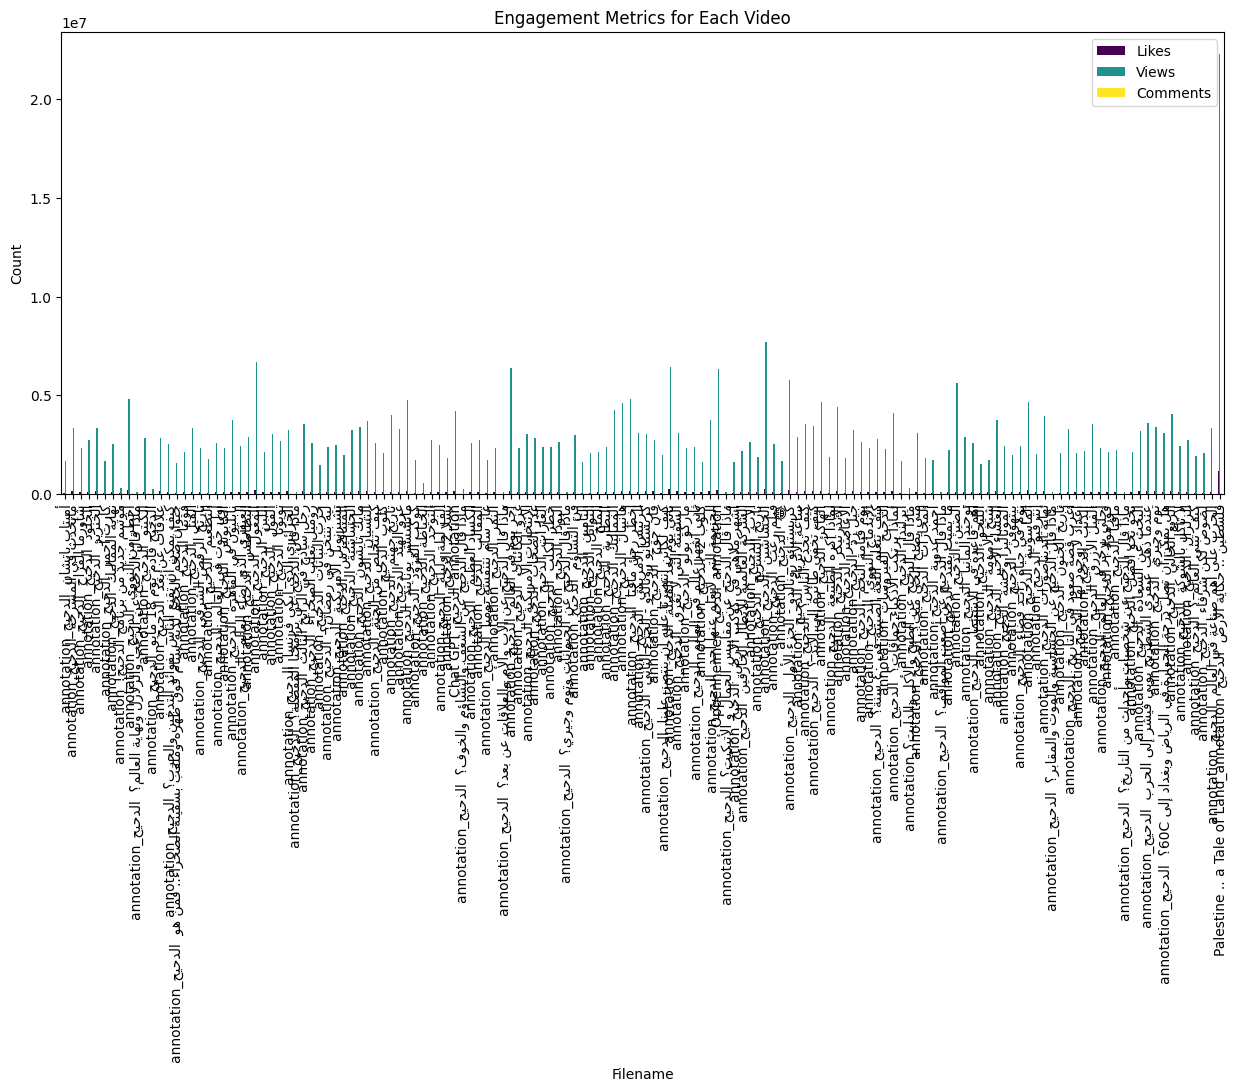

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Ensure numerical columns are correctly formatted
df_annotations[["Number_of_Likes", "Number_of_Views", "Number_of_Comments"]] = df_annotations[
    ["Number_of_Likes", "Number_of_Views", "Number_of_Comments"]
].astype(float)

df_annotations["Fixed_Filename"] = df_annotations["Filename"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Plot engagement metrics as a bar chart
df_annotations.set_index("Fixed_Filename")[["Number_of_Likes", "Number_of_Views", "Number_of_Comments"]].plot(
    kind="bar", figsize=(15, 6), colormap="viridis"
)

plt.title("Engagement Metrics for Each Video")
plt.xlabel("Filename")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend(["Likes", "Views", "Comments"])
plt.show()


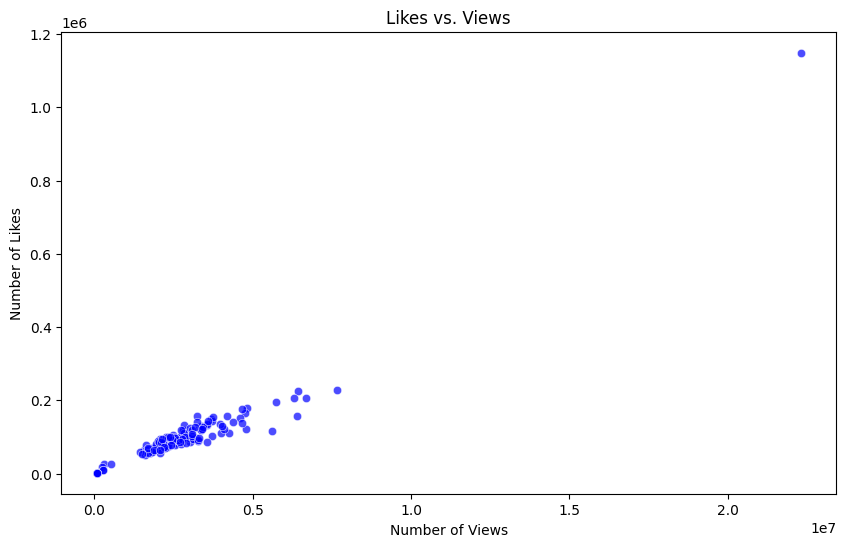

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot for Likes vs. Views
sns.scatterplot(data=df_annotations, x="Number_of_Views", y="Number_of_Likes", color="blue", alpha=0.7)

plt.title("Likes vs. Views")
plt.xlabel("Number of Views")
plt.ylabel("Number of Likes")
plt.show()


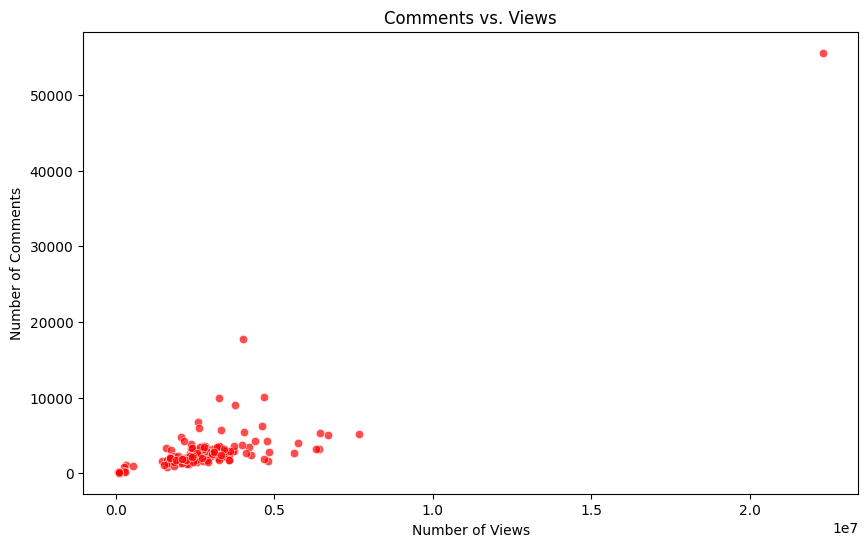

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Scatter plot for Comments vs. Views
sns.scatterplot(data=df_annotations, x="Number_of_Views", y="Number_of_Comments", color="red", alpha=0.7)

plt.title("Comments vs. Views")
plt.xlabel("Number of Views")
plt.ylabel("Number of Comments")
plt.show()


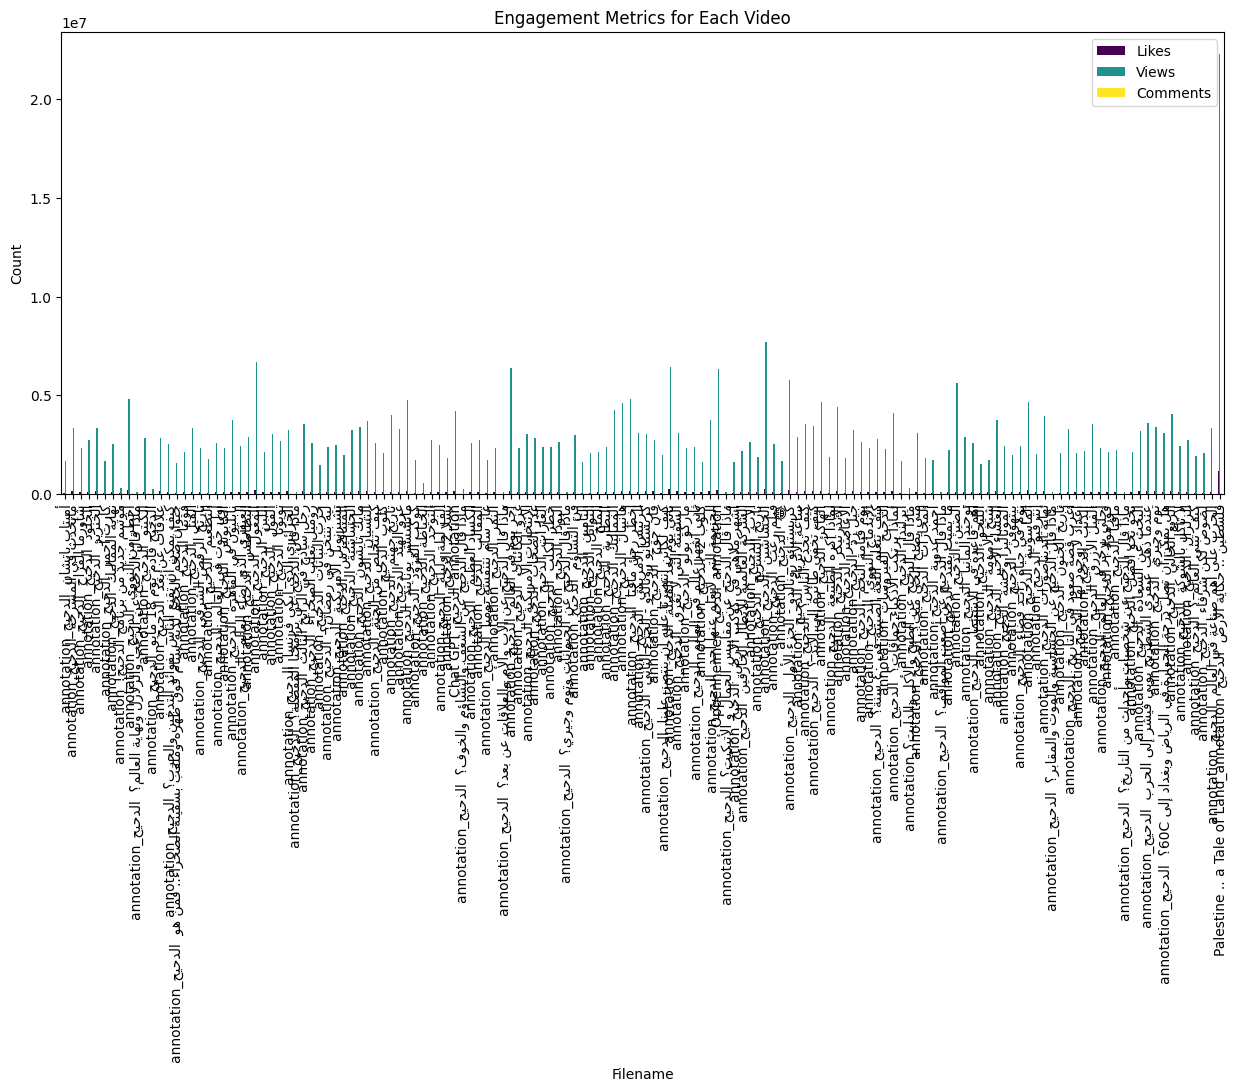

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

# Ensure numerical columns are correctly formatted
df_annotations[["Number_of_Likes", "Number_of_Views", "Number_of_Comments"]] = df_annotations[
    ["Number_of_Likes", "Number_of_Views", "Number_of_Comments"]
].astype(float)

df_annotations["Fixed_Filename"] = df_annotations["Filename"].apply(lambda x: get_display(arabic_reshaper.reshape(x)))

# Plot engagement metrics as a bar chart (without clustering)
df_annotations.set_index("Fixed_Filename")[["Number_of_Likes", "Number_of_Views", "Number_of_Comments"]].plot(
    kind="bar", figsize=(15, 6), colormap="viridis"
)

plt.title("Engagement Metrics for Each Video")
plt.xlabel("Filename")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend(["Likes", "Views", "Comments"])
plt.show()


In [34]:
top_viewed = df_annotations.sort_values(by="Number_of_Views", ascending=False).head(10)
print("Top 10 Most Viewed Videos:")
top_viewed[["Filename", "Number_of_Views"]]


Top 10 Most Viewed Videos:


Filename  Number_of_Views
145  فلسطين .. حكاية الأرض  الدحيح  Palestine .. a ...       22313352.0
88                         الحشاشين  الدحيح_annotation        7675243.0
24                           المغول  الدحيح_annotation        6693453.0
76             تاني يوم بعد القنبلة  الدحيح_annotation        6445801.0
56                آخر يوم في العالم  الدحيح_annotation        6396147.0
82                      Oppenheimer  الدحيح_annotation        6313109.0
91   كريستيانو رونالدو - الجزء الأول  الدحيح_annota...        5748359.0
112                           الصين  الدحيح_annotation        5602833.0
8                    أخطر من النووي  الدحيح_annotation        4819480.0
71                   أخطر رجل مافيا  الدحيح_annotation        4801401.0

In [35]:
top_liked = df_annotations.sort_values(by="Number_of_Likes", ascending=False).head(10)
print("Top 10 Most Liked Videos:")
top_liked[["Filename", "Number_of_Likes"]]


Top 10 Most Liked Videos:


Filename  Number_of_Likes
145  فلسطين .. حكاية الأرض  الدحيح  Palestine .. a ...        1148989.0
88                         الحشاشين  الدحيح_annotation         228227.0
76             تاني يوم بعد القنبلة  الدحيح_annotation         224721.0
82                      Oppenheimer  الدحيح_annotation         206192.0
24                           المغول  الدحيح_annotation         205255.0
91   كريستيانو رونالدو - الجزء الأول  الدحيح_annota...         194739.0
8                    أخطر من النووي  الدحيح_annotation         178838.0
121                       الماسونية  الدحيح_annotation         175676.0
43                  مانشستر يونايتد  الدحيح_annotation         165894.0
49                         Chat GPT  الدحيح_annotation         158194.0

In [36]:
top_commented = df_annotations.sort_values(by="Number_of_Comments", ascending=False).head(10)
print("Top 10 Most Commented Videos:")
top_commented[["Filename", "Number_of_Comments"]]


Top 10 Most Commented Videos:


Filename  Number_of_Comments
145  فلسطين .. حكاية الأرض  الدحيح  Palestine .. a ...             55595.0
41                       تاريخ جهنم  الدحيح_annotation             17705.0
121                       الماسونية  الدحيح_annotation             10122.0
28         الجزائري الذي أبكى فرنسا  الدحيح_annotation              9935.0
117                   العشاء الأخير  الدحيح_annotation              8982.0
19                أول حوت في العالم  الدحيح_annotation              6747.0
70                          هانيبال  الدحيح_annotation              6220.0
62                           البوذا  الدحيح_annotation              5907.0
4                           الخنزير  الدحيح_annotation              5699.0
139                    الربع الخالي  الدحيح_annotation              5408.0

In [37]:
import pandas as pd
import numpy as np
import plotly.express as px

# Ensure numerical columns are correctly formatted
df_annotations[["Number_of_Likes", "Number_of_Views", "Number_of_Comments"]] = df_annotations[
    ["Number_of_Likes", "Number_of_Views", "Number_of_Comments"]
].astype(float)

# Function to group sorted episodes into groups and calculate the average
def group_and_avg(df, metric_column, n_groups=30):
    # Sort episodes by the metric
    df_sorted = df.sort_values(by=metric_column, ascending=True).reset_index(drop=True)

    # Assign group labels based on the sorted order
    df_sorted["Group"] = pd.cut(df_sorted.index, bins=n_groups, labels=np.arange(n_groups))

    # Aggregate data by group
    df_grouped = df_sorted.groupby("Group").agg({
        "Filename": lambda x: "<br>".join(x),  # Combine filenames for hover
        metric_column: "mean"  # Calculate the average for the group
    }).reset_index()

    return df_grouped

# Group and calculate averages for Likes, Views, and Comments
n_groups = 30  # Number of groups (adjust as needed)
df_likes_grouped = group_and_avg(df_annotations, "Number_of_Likes", n_groups)
df_views_grouped = group_and_avg(df_annotations, "Number_of_Views", n_groups)
df_comments_grouped = group_and_avg(df_annotations, "Number_of_Comments", n_groups)

# Create separate plots for Likes, Views, and Comments
fig_likes = px.bar(df_likes_grouped, x="Group", y="Number_of_Likes",
                   title="Average Likes per Video Group",
                   labels={"Number_of_Likes": "Average Likes", "Group": "Group"},
                   hover_data={"Filename": True})

fig_views = px.bar(df_views_grouped, x="Group", y="Number_of_Views",
                   title="Average Views per Video Group",
                   labels={"Number_of_Views": "Average Views", "Group": "Group"},
                   hover_data={"Filename": True})

fig_comments = px.bar(df_comments_grouped, x="Group", y="Number_of_Comments",
                      title="Average Comments per Video Group",
                      labels={"Number_of_Comments": "Average Comments", "Group": "Group"},
                      hover_data={"Filename": True})

# Update layout for better readability
fig_likes.update_layout(hovermode="x unified")
fig_views.update_layout(hovermode="x unified")
fig_comments.update_layout(hovermode="x unified")

# Show the plots
fig_likes.show()
fig_views.show()
fig_comments.show()

<ipython-input-37-6f5b0832c267>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_sorted.groupby("Group").agg({
<ipython-input-37-6f5b0832c267>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_sorted.groupby("Group").agg({
<ipython-input-37-6f5b0832c267>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_sorted.groupby("Group").agg({


In [40]:
# Define meaningful names based on top words
cluster_names = {
    0: "Sports & Football",
    1: "History & Wars",
    2: "Weapons & Nuclear Science",
    3: "Family & Biology",
    4: "Philosophy & Humanity"
}

# Map K-Means clusters to names
df_cleaned["Cluster_KMeans_Label"] = df_cleaned["Cluster_KMeans"].map(cluster_names)

# Display the updated clusters
df_cleaned[["Filename", "Cluster_KMeans_Label"]]

Filename  \
0                                     Chat GPT  الدحيح   
1                                  Oppenheimer  الدحيح   
2                            آخر يوم في العالم  الدحيح   
3                          أحلى برجر في العالم  الدحيح   
4                                   أحمد عدوية  الدحيح   
..                                                 ...   
140                                    هانيبال  الدحيح   
141  هل يمكن أن تصل درجة الحرارة في الرياض وبغداد إ...   
142                     يوم في حياة رائـد فضاء  الدحيح   
143                            يوم قيامة النجم  الدحيح   
144                                          😂  الدحيح   

          Cluster_KMeans_Label  
0        Philosophy & Humanity  
1    Weapons & Nuclear Science  
2    Weapons & Nuclear Science  
3        Philosophy & Humanity  
4        Philosophy & Humanity  
..                         ...  
140             History & Wars  
141      Philosophy & Humanity  
142  Weapons & Nuclear Science  
143      Philosophy & Humanity  
144      Philosophy & Humanity  

[145 rows x 2 columns]

In [41]:
# Step 1: Standardize filenames in both dataframes
df_annotations["Filename"] = df_annotations["Filename"].str.replace("_annotation", "", regex=False)
df_cleaned["Filename"] = df_cleaned["Filename"].str.replace(".txt", "", regex=False)

# Step 2: Merge the dataframes on the standardized filenames
# Use a left merge to keep all rows from df_annotations and add matching rows from df_cleaned
df_annotations_merged = df_annotations.merge(df_cleaned, on="Filename", how="left")

# Step 3: Verify the merge
# Check for missing values in the merged dataframe
missing_values = df_annotations_merged.isnull().sum()
print("Missing values after merge:\n", missing_values)

# Check the first few rows of the merged dataframe
#print("\nFirst few rows of the merged dataframe:\n", df_annotations_merged.head())
df_annotations_merged.head()

Missing values after merge:
 Filename                0
Number_of_Likes         0
Number_of_Views         0
Number_of_Comments      0
Fixed_Filename          0
Content                 1
Normalized              1
Normalized_new          1
Top TF-IDF Words        1
Cluster                 1
Cluster_KMeans          1
Cluster_DBSCAN          1
Cluster_KMeans_Label    1
dtype: int64


Filename  Number_of_Likes  Number_of_Views  \
0      أميتاب باتشان  الدحيح          61093.0        1689436.0   
1  مايحدث في المشرحة  الدحيح         121404.0        3359122.0   
2      شاورما الفراخ  الدحيح          79712.0        2319487.0   
3             الخلود  الدحيح          96290.0        2730000.0   
4            الخنزير  الدحيح         125079.0        3318133.0   

   Number_of_Comments                        Fixed_Filename  \
0              1634.0      annotation_ﺢﻴﺣﺪﻟﺍ  ﻥﺎﺸﺗﺎﺑ ﺏﺎﺘﻴﻣﺃ   
1              2144.0  annotation_ﺢﻴﺣﺪﻟﺍ  ﺔﺣﺮﺸﻤﻟﺍ ﻲﻓ ﺙﺪﺤﻳﺎﻣ   
2              2176.0      annotation_ﺢﻴﺣﺪﻟﺍ  ﺥﺍﺮﻔﻟﺍ ﺎﻣﺭﻭﺎﺷ   
3              3554.0             annotation_ﺢﻴﺣﺪﻟﺍ  ﺩﻮﻠﺨﻟﺍ   
4              5699.0            annotation_ﺢﻴﺣﺪﻟﺍ  ﺮﻳﺰﻨﺨﻟﺍ   

                                             Content  \
0                                                NaN   
1  16.823: ولا يا "طَرْش"! 18.394: انت بتعمل إيه ...   
2  9.84: لو سمحت 11.01: [موسيقى] 18.119: اعمل 19....   
3  3.205: والنبي يا دكتور، تقولي إيه اللي هيحصل ك...   
4  0.653: !أقسم بالله ما هسيبه غير إمّا يعتذر 3.3...   

                                          Normalized  \
0                                                NaN   
1  يا طَرْش! انت بتعمل يا يا طَرْش؟! بافتح الخزنه...   
2  لو سمحت اعمل انا بجد مش مصدق نفسي انا كنت عايز...   
3  والنبي يا دكتور تقولي هيحصل كدا تاني معلش؟ اوف...   
4  !اقسم بالله هسيبه امّا يعتذر !اهدا يا عم اهدا ...   

                                      Normalized_new  \
0                                                NaN   
1  طَرْش! بتعمل طَرْش؟! بافتح الخزنه طَفْش مالك؟!...   
2  لو سمحت اعمل انا بجد مصدق نفسي انا كنت عايزاه ...   
3  والنبي دكتور تقولي هيحصل كدا تاني معلش؟ اوف! ل...   
4  !اقسم بالله هسيبه امّا يعتذر !اهدا عم اهدا هشر...   

               Top TF-IDF Words  Cluster  Cluster_KMeans  Cluster_DBSCAN  \
0                           NaN      NaN             NaN             NaN   
1      [عزيزي, لو, كدا, زي, لم]      0.0             3.0             9.0   
2  [عزيزي, عشان, اكتر, زي, سنه]      2.0             4.0             1.0   
3   [عزيزي, زي, سنه, ممكن, انا]      0.0             4.0             8.0   
4   [عزيزي, كدا, عشان, زي, انا]      4.0             3.0             3.0   

    Cluster_KMeans_Label  
0                    NaN  
1       Family & Biology  
2  Philosophy & Humanity  
3  Philosophy & Humanity  
4       Family & Biology

In [42]:
import plotly.express as px

# Step 1: Group by Cluster_KMeans_Label and calculate averages
df_cluster_avg = df_annotations_merged.groupby("Cluster_KMeans_Label").agg({
    "Number_of_Likes": "mean",
    "Number_of_Views": "mean",
    "Number_of_Comments": "mean"
}).reset_index()

# Rename columns for better readability
df_cluster_avg = df_cluster_avg.rename(columns={
    "Number_of_Likes": "Avg_Likes",
    "Number_of_Views": "Avg_Views",
    "Number_of_Comments": "Avg_Comments"
})

# Step 2: Create separate plots for each metric
# Plot for Average Likes
fig_likes = px.bar(df_cluster_avg, x="Cluster_KMeans_Label", y="Avg_Likes",
                   title="Average Likes per Cluster",
                   labels={"Cluster_KMeans_Label": "Cluster", "Avg_Likes": "Average Likes"},
                   hover_data={"Cluster_KMeans_Label": True, "Avg_Likes": True})

# Plot for Average Views
fig_views = px.bar(df_cluster_avg, x="Cluster_KMeans_Label", y="Avg_Views",
                   title="Average Views per Cluster",
                   labels={"Cluster_KMeans_Label": "Cluster", "Avg_Views": "Average Views"},
                   hover_data={"Cluster_KMeans_Label": True, "Avg_Views": True})

# Plot for Average Comments
fig_comments = px.bar(df_cluster_avg, x="Cluster_KMeans_Label", y="Avg_Comments",
                      title="Average Comments per Cluster",
                      labels={"Cluster_KMeans_Label": "Cluster", "Avg_Comments": "Average Comments"},
                      hover_data={"Cluster_KMeans_Label": True, "Avg_Comments": True})

# Step 3: Update layout for better readability
fig_likes.update_layout(hovermode="x unified")
fig_views.update_layout(hovermode="x unified")
fig_comments.update_layout(hovermode="x unified")

# Show the plots
fig_likes.show()
fig_views.show()
fig_comments.show()